In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

# Path where csv file is located
data_path = "csv_file/WA_Fn-UseC_-Telco-Customer-Churn.csv" 
#Reading the csv file
data_churn = pd.read_csv(data_path)
#Reading csv file
data_churn.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [46]:
# Checking the number of customerid.
customerid_count=len(data_churn['customerID'].value_counts())
customerid_count

7043

In [48]:
#Counting unique values
unique_customerID = data_churn['customerID'].nunique()
unique_customerID

7043

In [50]:
#CHecking shape
data_churn.shape

(7043, 21)

In [52]:
#checking columns
data_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [54]:
#Getting information from dataframe
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [56]:
#Counting cell in the total of columns
data_churn.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [58]:
#Verifying cell in blank
blank_cells = data_churn.applymap(lambda x: pd.isna(x) or x == '')
print(blank_cells)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0          False   False          False    False       False   False   
1          False   False          False    False       False   False   
2          False   False          False    False       False   False   
3          False   False          False    False       False   False   
4          False   False          False    False       False   False   
...          ...     ...            ...      ...         ...     ...   
7038       False   False          False    False       False   False   
7039       False   False          False    False       False   False   
7040       False   False          False    False       False   False   
7041       False   False          False    False       False   False   
7042       False   False          False    False       False   False   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0            False          False            False          

C:\Users\User\AppData\Local\Temp\ipykernel_21360\3782148306.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  blank_cells = data_churn.applymap(lambda x: pd.isna(x) or x == '')


In [60]:
#Trying to convert cell TotalCharges to float since it is as object
data_churn=data_churn.astype({"TotalCharges":float})

ValueError: could not convert string to float: ' ': Error while type casting for column 'TotalCharges'

In [62]:
#Since we got an error while converting to float. so we are just adding 0 to the empty cells and corverting the column to float
data_churn['TotalCharges'] = pd.to_numeric(data_churn['TotalCharges'], errors='coerce')
data_churn['TotalCharges'] = data_churn['TotalCharges'].fillna(0)
data_churn['TotalCharges'] = data_churn['TotalCharges'].astype(float)
data_churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [64]:
#counting how many cells are == 0
count_totalcharges_0_values = (data_churn['TotalCharges'] == 0).sum()
count_totalcharges_0_values

11

In [66]:
#droping rows where TotalCharges==0
data_churn = data_churn[data_churn['TotalCharges'] != 0]
data_churn.count()

customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
dtype: int64

In [68]:
#dropping customerID since we don't need it. We are going to use the default index as unique key.
data_churn = data_churn.drop(columns=['customerID'])
data_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [70]:
#describing the data
data_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [72]:
#data frame to analyze contract type and churn (Hypothesis 2)
data_churn2 = data_churn
data_churn2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
#drop the column not relevant to the study: InternetService,DeviceProtection, PaperlessBilling
data_churn2 = data_churn2.drop(columns=['InternetService', 'DeviceProtection','PaperlessBilling'])
data_churn2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,No,Yes,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,Yes,No,No,No,No,One year,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,Yes,Yes,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,Yes,No,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes


In [76]:
#rename contract to contract type
data_churn2=data_churn2.rename(columns={"Contract":"Contract Type"})
data_churn2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract Type,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,No,Yes,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,Yes,No,No,No,No,One year,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,Yes,Yes,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,Yes,No,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,Yes,No,Yes,Yes,Yes,One year,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,No,Yes,No,Yes,Yes,One year,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,Yes,No,No,No,No,Month-to-month,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,No,No,No,No,No,Month-to-month,Mailed check,74.40,306.60,Yes


In [78]:
#count the number of churn vs non churn  by contract type
churn_counts=data_churn2.groupby('Contract Type')['Churn'].value_counts()
churn_counts

Contract Type   Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1306
                Yes       166
Two year        No       1637
                Yes        48
Name: count, dtype: int64

In [80]:
#Reset the index to add Contract Type and Churn to a column
churn_counts= churn_counts.reset_index()
churn_counts

,Contract Type,Churn,count
0,Month-to-month,No,2220
1,Month-to-month,Yes,1655
2,One year,No,1306
3,One year,Yes,166
4,Two year,No,1637
5,Two year,Yes,48


In [82]:
#Convert the date to Data Frame
df_churn_counts=pd.DataFrame (churn_counts)
df_churn_counts


,Contract Type,Churn,count
0,Month-to-month,No,2220
1,Month-to-month,Yes,1655
2,One year,No,1306
3,One year,Yes,166
4,Two year,No,1637
5,Two year,Yes,48


In [84]:
#rename row in Contract Type
df_churn_counts['Contract Type'] = df_churn_counts['Contract Type'].replace({'Month-to-month': 'Monthly'})
df_churn_counts

,Contract Type,Churn,count
0,Monthly,No,2220
1,Monthly,Yes,1655
2,One year,No,1306
3,One year,Yes,166
4,Two year,No,1637
5,Two year,Yes,48


In [86]:
#use groupby to get the churn totals
##count the total churn and non churn customers as per Contract Type
churn_totals = df_churn_counts.groupby('Churn')['count'].sum()
No = churn_totals['No']
Yes = churn_totals['Yes']
print('Total non-churn customers:', No)
print('Total churn customers:', Yes)

Total non-churn customers: 5163
Total churn customers: 1869


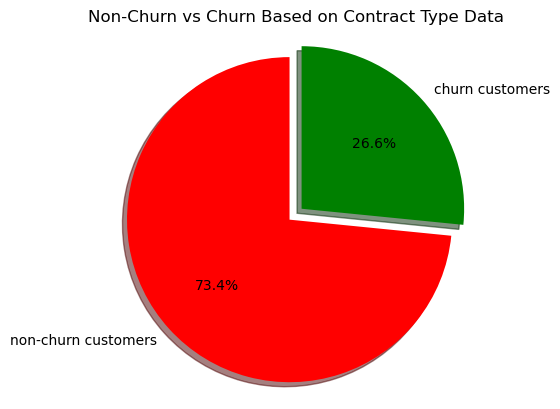

In [88]:
#Create the pie chart to compare churn vs non-churn rate based on Contract Type Data
churn = ["non-churn customers", "churn customers"]
customers = [No,Yes]
colors = ["red","green"]
explode = (0,0.1)

# Create the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(customers, explode=explode, labels=churn, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Non-Churn vs Churn Based on Contract Type Data")
plt.axis('equal')
plt.show()

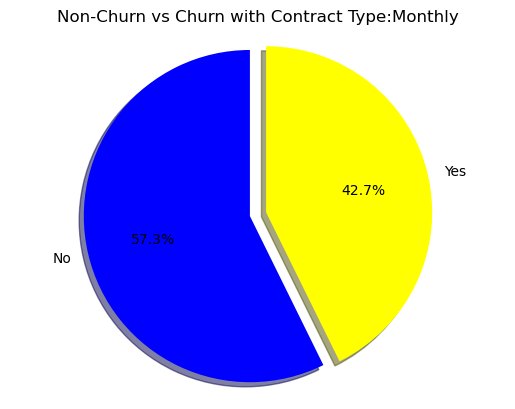

In [90]:
#create the pie chart to show churn of  monthly customers 
#Filter data for 'Monthly' contract type
Monthly = df_churn_counts[df_churn_counts['Contract Type'] == 'Monthly']
churn_monthly = Monthly['Churn']
customers = Monthly['count']
colors = ['blue', 'yellow']
explode = (0,0.1)  

plt.pie(customers, explode=explode, labels=churn_monthly, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Non-Churn vs Churn with Contract Type:Monthly")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

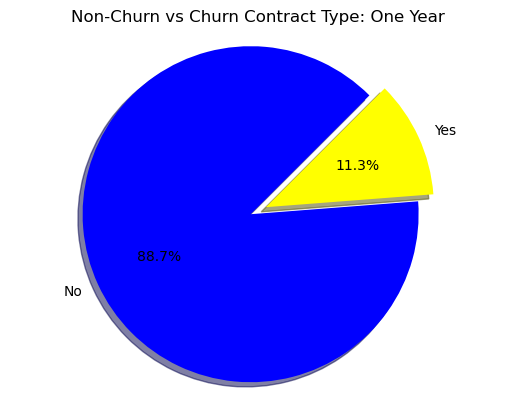

In [92]:
#create the pie chart to show churn of  monthly customers 
#Filter data for 'Monthly' contract type
Monthly = df_churn_counts[df_churn_counts['Contract Type'] == 'One year']
churn_monthly = Monthly['Churn']
customers = Monthly['count']
colors = ['blue', 'yellow']
explode = (0,0.1)  

plt.pie(customers, explode=explode, labels=churn_monthly, colors=colors, autopct='%1.1f%%', shadow=True, startangle=45)
plt.title("Non-Churn vs Churn Contract Type: One Year")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

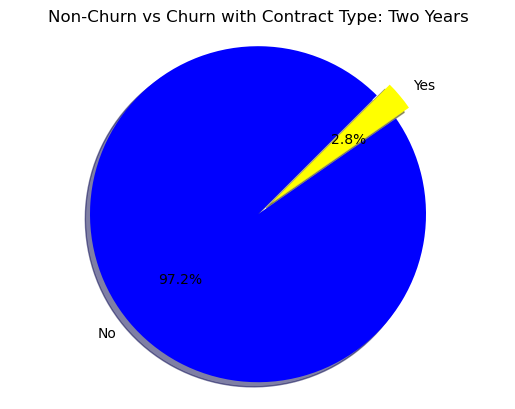

In [94]:
#create the pie chart to show churn of  monthly customers 
#Filter data for 'Monthly' contract type
Monthly = df_churn_counts[df_churn_counts['Contract Type'] == 'Two year']
churn_monthly = Monthly['Churn']
customers = Monthly['count']
colors = ['blue', 'yellow']
explode = (0,0.1)  

plt.pie(customers, explode=explode, labels=churn_monthly, colors=colors, autopct='%1.1f%%', shadow=True, startangle=45)
plt.title("Non-Churn vs Churn with Contract Type: Two Years")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [97]:
#count the percent churn by contract 
churn_percent =data_churn2.groupby('Contract Type')['Churn'].value_counts(normalize=True)
churn_percent

Contract Type   Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887228
                Yes      0.112772
Two year        No       0.971513
                Yes      0.028487
Name: proportion, dtype: float64

In [100]:
#convert the date to date frame
df_churn_percent= pd.DataFrame(churn_percent)
df_churn_percent


proportion
Contract Type  Churn            
Month-to-month No       0.572903
               Yes      0.427097
One year       No       0.887228
               Yes      0.112772
Two year       No       0.971513
               Yes      0.028487

In [102]:
#Reset the index to add Contract Type and Churn to a column
churn_percent= churn_percent.reset_index()
churn_percent

,Contract Type,Churn,proportion
0,Month-to-month,No,0.572903
1,Month-to-month,Yes,0.427097
2,One year,No,0.887228
3,One year,Yes,0.112772
4,Two year,No,0.971513
5,Two year,Yes,0.028487


In [104]:
#Convert the decimal to percentge
churn_percent['proportion'] = churn_percent['proportion']*100
churn_percent


,Contract Type,Churn,proportion
0,Month-to-month,No,57.290323
1,Month-to-month,Yes,42.709677
2,One year,No,88.722826
3,One year,Yes,11.277174
4,Two year,No,97.151335
5,Two year,Yes,2.848665


In [106]:
#Create a data frame
df_churn_percent = pd.DataFrame(churn_percent)
df_churn_percent 

,Contract Type,Churn,proportion
0,Month-to-month,No,57.290323
1,Month-to-month,Yes,42.709677
2,One year,No,88.722826
3,One year,Yes,11.277174
4,Two year,No,97.151335
5,Two year,Yes,2.848665


In [108]:
#use sorting to sort the Churn column to Yes and No
df_churn_percent = df_churn_percent.sort_values(["proportion"], ascending=True)
df_churn_percent

,Contract Type,Churn,proportion
5,Two year,Yes,2.848665
3,One year,Yes,11.277174
1,Month-to-month,Yes,42.709677
0,Month-to-month,No,57.290323
2,One year,No,88.722826
4,Two year,No,97.151335


In [110]:
#rename proportion to Percentage
df_churn_percent=df_churn_percent.rename(columns={'proportion':'Percentage(%)'})
df_churn_percent

,Contract Type,Churn,Percentage(%)
5,Two year,Yes,2.848665
3,One year,Yes,11.277174
1,Month-to-month,Yes,42.709677
0,Month-to-month,No,57.290323
2,One year,No,88.722826
4,Two year,No,97.151335


In [112]:
#  Create a new df for  rows with Churn "Yes" 
churn_contract_type =df_churn_percent.loc[(df_churn_percent['Churn'] == "Yes")]
churn_contract_type

,Contract Type,Churn,Percentage(%)
5,Two year,Yes,2.848665
3,One year,Yes,11.277174
1,Month-to-month,Yes,42.709677


In [114]:
# Set x axis and tick locations
x_axis = np.arange(len(churn_contract_type))
tick_locations = [value for value in x_axis]

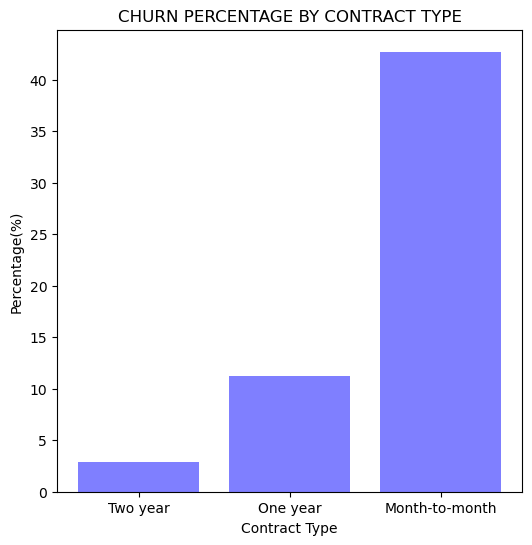

In [126]:
plt.figure(figsize=(6,6))
plt.bar(x_axis, churn_contract_type["Percentage(%)"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, churn_contract_type["Contract Type"], rotation="horizontal")
plt.xlabel("Contract Type")
plt.ylabel("Percentage(%)")
plt.title("CHURN PERCENTAGE BY CONTRACT TYPE")
plt.show()

In [118]:
#Conclusion: The statement Customers with month-to-month contracts are more likely to churn compared to those with longer-term contracts is correct

In [120]:
df_churn_percent

,Contract Type,Churn,Percentage(%)
5,Two year,Yes,2.848665
3,One year,Yes,11.277174
1,Month-to-month,Yes,42.709677
0,Month-to-month,No,57.290323
2,One year,No,88.722826
4,Two year,No,97.151335


In [122]:
#Check the correlation - #used Co-pilot  for the coding to convert Contract Type and Churn to numeric values in order to find the correlation using pearson
# Label encode 'Contract Type'
label_encoder = LabelEncoder()
df_churn_percent['Contract Type'] = label_encoder.fit_transform(df_churn_percent['Contract Type'])

# Encode 'Churn' as numerical (Yes=1, No=0)
df_churn_percent['Churn'] = df_churn_percent['Churn'].map({'Yes': 1, 'No': 0})

# Check for constant data to check 'NAN"error
print(df_churn_percent['Contract Type'].unique())
print(df_churn_percent['Churn'].unique())

# Check for missing values to check 'NAN' error
print(df_churn_percent.isna().sum())

# Verify data
print(df_churn_percent.head())

# Calculate Pearson correlation
correlation, p_value = pearsonr(df_churn_percent['Contract Type'], df_churn_percent['Churn'])
print(f'Pearson correlation coefficient: {correlation}')
print(f'P-value: {p_value}')


[2 1 0]
[1 0]
Contract Type    0
Churn            0
Percentage(%)    0
dtype: int64
   Contract Type  Churn  Percentage(%)
5              2      1       2.848665
3              1      1      11.277174
1              0      1      42.709677
0              0      0      57.290323
2              1      0      88.722826
Pearson correlation coefficient: 0.0
P-value: 1.0


In [124]:
#print the new data frame
df_churn_percent

,Contract Type,Churn,Percentage(%)
5,2,1,2.848665
3,1,1,11.277174
1,0,1,42.709677
0,0,0,57.290323
2,1,0,88.722826
4,2,0,97.151335


In [ ]:
#Convert the decimal to percentage
#churn_contract_type['Percentage'] =churn_contract_type['Percentage']*100
#churn_contract_type

In [ ]:
#convert the percentage to string and add the % sign
#churn_contract_type['Percentage']= churn_contract_type['Percentage'].astype(str) + '%'
#churn_contract_type

In [ ]:
#round the Percentage to two decimal places
#churn_contract_type['Percentage']=churn_contract_type['Percentage'].round(2)
#churn_contract_type

In [ ]:
#convert the percentage to string and add the % sign
#df_contract_type['Percentage'] = df_contract_type['Percentage'].astype(str) + '%'
df_contract_type

In [ ]:
#use sorting to sort the Churn column to Yes and No
churn_contract_type = df_contract_type.sort_values(["Percentage"], ascending=True)
churn_contract_type

In [ ]:
#  Create a new df for "Yes" with the rows. 
churn_contract_type = churn_contract_type.loc[(churn_contract_type['Churn'] == "Yes")]
churn_contract_type

In [ ]:
#Convert the decimal to percentage
churn_contract_type['Percentage']=churn_contract_type['Percentage'] * 100
churn_contract_type

In [ ]:
# Use Map to format the Percentage column
#churn_contract_type["Percentage"] = (churn_contract_type["Percentage"]*100).map("{:.2f}%".format)
#churn_contract_type

In [ ]:
#use sorting to sort the Churn column to Yes and No
churn_contract_type = df_contract_type.sort_values(["Churn"], ascending=False)
churn_contract_type

In [ ]:
#  Create a new df for "Yes" with the rows. 
churn_contract_type = churn_contract_type.loc[(churn_contract_type['Churn'] == "Yes")]
churn_contract_type

In [ ]:
churn_contract_type = df_contract_type.sort_values(["Percentage"], ascending=True)
churn_contract_type

In [ ]:

#Use df.astype() to convert the Percentage column to convert to float
#df_contract_type['Percentage'] = df_contract_type['Percentage'].astype(float)
#df_contract_type

In [ ]:
#df_contract_type['proportion'] = df_contract_type['proportion'].round(decimals=4)
#print(df_contract_type)

In [ ]:
##drop the index column since it is a duplicate
#contract_type= contract_type.drop(columns=['index'])
#contract_type

In [ ]:
#What factors lead to customer Churn in Telecom Industry?  


#Which factor is positively correlated to the Churn? 


#How can a Telecom industry retain customers in the future? 